In [1]:
import os
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa

## Get time series data

In [2]:
industrial_production = (
    pdr.DataReader("IPGMFN", "fred", "1988", "2017-12").squeeze().dropna()
)
industrial_production

DATE
1988-01-01     55.6315
1988-02-01     56.8324
1988-03-01     57.5487
1988-04-01     57.7727
1988-05-01     57.8687
                ...   
2017-08-01    100.7360
2017-09-01    100.3586
2017-10-01    101.9040
2017-11-01    100.6590
2017-12-01     99.5281
Name: IPGMFN, Length: 360, dtype: float64

In [3]:
nasdaq = pdr.DataReader("NASDAQCOM", "fred", "1990", "2017-12-31").squeeze().dropna()
nasdaq

DATE
1990-01-02     459.33
1990-01-03     460.90
1990-01-04     459.39
1990-01-05     458.22
1990-01-08     458.71
               ...   
2017-12-22    6959.96
2017-12-26    6936.25
2017-12-27    6939.34
2017-12-28    6950.16
2017-12-29    6903.39
Name: NASDAQCOM, Length: 7056, dtype: float64

## Plot decomposition

In [4]:
components = tsa.seasonal_decompose(industrial_production, model="additive")
ts_df = (
    industrial_production.to_frame("original")
    .assign(trend=components.trend)
    .assign(seasonality=components.seasonal)
    .assign(residual=components.resid)
)
ts_df

,original,trend,seasonality,residual
DATE,,,,
1988-01-01,55.6315,NaN,-2.090507,NaN
1988-02-01,56.8324,NaN,-0.579679,NaN
1988-03-01,57.5487,NaN,0.747645,NaN
1988-04-01,57.7727,NaN,-0.233705,NaN
1988-05-01,57.8687,NaN,0.192588,NaN
...,...,...,...,...
2017-08-01,100.7360,NaN,0.908542,NaN
2017-09-01,100.3586,NaN,1.470945,NaN
2017-10-01,101.9040,NaN,1.508397,NaN


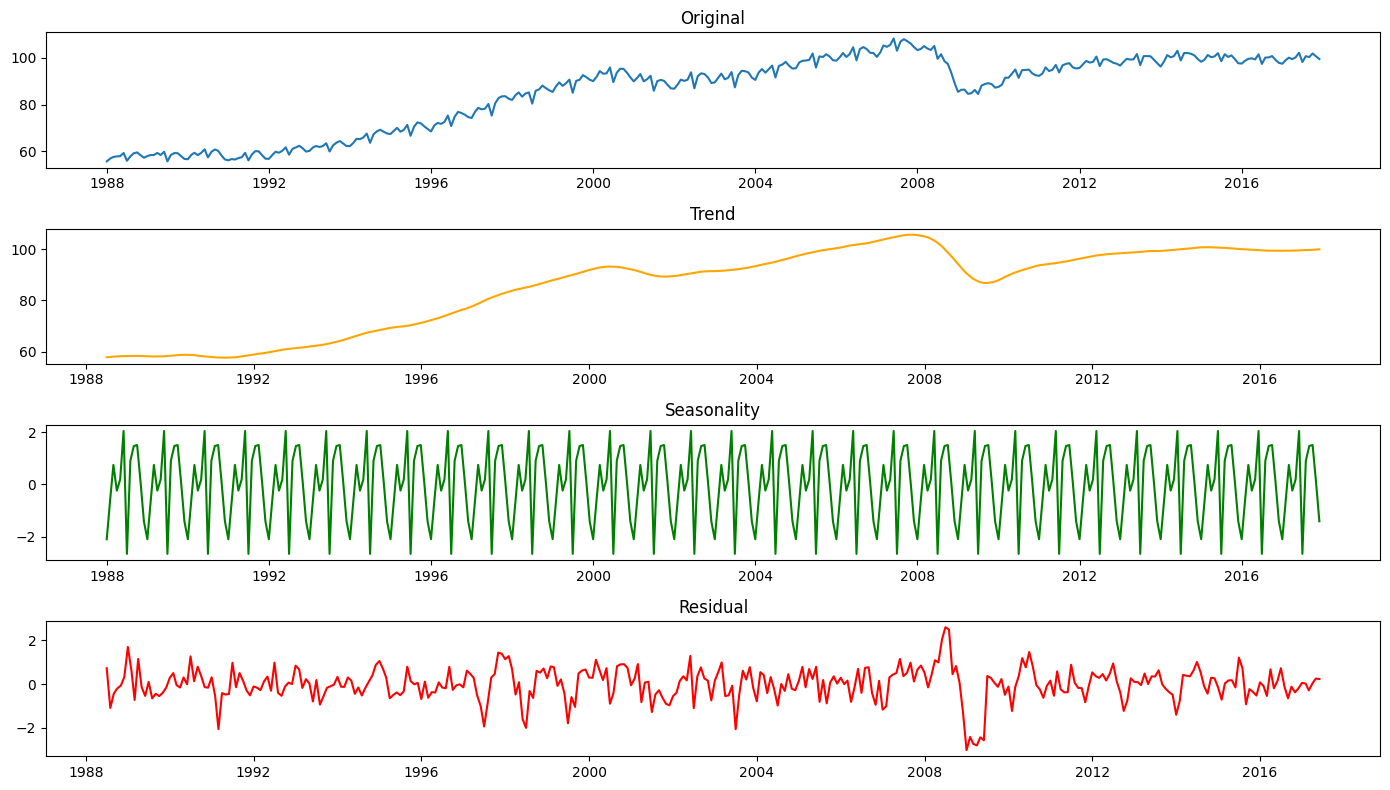

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))
axs[0].plot(ts_df["original"])
axs[0].set_title("Original")
axs[1].plot(ts_df["trend"], color="orange")
axs[1].set_title("Trend")
axs[2].plot(ts_df["seasonality"], color="green")
axs[2].set_title("Seasonality")
axs[3].plot(ts_df["residual"], color="red")
axs[3].set_title("Residual")
plt.tight_layout()